**Importing necessary libraries.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

**Uploading dataset**

In [4]:
df = pd.read_csv("hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")

C:\Users\aks50\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (1,2,7,11,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('display.max_columns', None)

**Performing EDA**

In [6]:
df

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,Not Span/Hispanic,15,Emergency,Home w/ Home Health Services,2010,231.0,OTHER FRACTURE,61.0,OT OR PRCS VES NOT HEAD,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Extreme,Surgical,Insurance Company,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,Not Span/Hispanic,3,Emergency,Home w/ Home Health Services,2010,42.0,SECONDARY MALIGNANCY,0.0,NO PROC,240,DIGESTIVE MALIGNANCY,6,Diseases and Disorders of the Digestive System,3,Major,Major,Medical,Medicare,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,5,Elective,Home w/ Home Health Services,2010,254.0,REHAB/PROSTH FIT/ADJUST,215.0,OT PHYS THER/REHAB,860,REHABILITATION,23,"Rehabilitation, Aftercare, Other Factors Influ...",2,Moderate,Minor,Medical,Medicare,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,Not Span/Hispanic,4,Elective,Inpatient Rehabilitation Facility,2010,203.0,OSTEOARTHRITIS,153.0,"HIP REPLACEMENT,TOT/PRT",301,HIP JOINT REPLACEMENT,8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Surgical,Medicare,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,29,Emergency,Home w/ Home Health Services,2010,181.0,OTHR PREGNANCY COMPL,75.0,SMALL BOWEL RESECTON,546,OTHER O.R. PROC FOR OBSTETRIC DIAGNOSES EXCEPT...,14,"Pregnancy, Childbirth and the Puerperium",3,Major,Minor,Surgical,Blue Cross,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,1,Urgent,Home or Self Care,2010,181.0,OTHR PREGNANCY COMPL,128.0,DX DILAT/CURETTAGE -D&C,544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",2,Moderate,Minor,Surgical,Blue Cross,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,Not Span/Hispanic,4,Emergency,Home or Self Care,2010,178.0,INDUCED ABORTION,126.0,ABORTION (TERM OF PREG),544,"D&C, ASPIRATION CURETTAGE OR HYSTEROTOMY FOR O...",14,"Pregnancy, Childbirth and the Puerperium",1,Minor,Minor,Surgical,Insurance Company,Self-Pay,NaN,NaN,NaN,NaN,0

In [7]:
df.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [9]:
df.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.622133e+06,2.617246e+06,2.617246e+06,2622133.0,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,1.311066e+06,5.019051e+06,1.036953e+03,2010.0,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,7.569447e+05,2.249577e+06,6.448892e+02,0.0,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,0.000000e+00,1.010000e+05,1.000000e+00,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.555330e+05,2.951001e+06,5.410000e+02,2010.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,1.311066e+06,5.907002e+06,1.117000e+03,2010.0,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,1.966599e+06,7.002002e+06,1.450000e+03,2010.0,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,2.622132e+06,7.004010e+06,9.059000e+03,2010.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


**Seeing null values of dataset.**

In [10]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [11]:
df.drop(columns = ['Source of Payment 2', 'Source of Payment 3', 'Operating Provider License Number', 'Other Provider License Number'], inplace = True)

In [12]:
df.isnull().sum()

index                                     0
Health Service Area                    4887
Hospital County                        4887
Operating Certificate Number           4887
Facility ID                            4887
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    3201
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
Discharge Year                            0
CCS Diagnosis Code                     2273
CCS Diagnosis Description              2273
CCS Procedure Code                     2273
CCS Procedure Description              2273
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description             

In [13]:
df.dropna(subset=['Operating Certificate Number'], inplace=True)

In [14]:
df.isnull().sum()

index                                     0
Health Service Area                       0
Hospital County                           0
Operating Certificate Number              0
Facility ID                               0
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                    3200
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                     103
Discharge Year                            0
CCS Diagnosis Code                     2270
CCS Diagnosis Description              2270
CCS Procedure Code                     2270
CCS Procedure Description              2270
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description             

In [15]:
df.dropna(subset=['Zip Code - 3 digits', 'CCS Diagnosis Code', 'APR Severity of Illness Description'], inplace=True)

In [16]:
df.drop('Zip Code - 3 digits', axis=1, inplace=True)

In [17]:
df.isnull().sum()

index                                    0
Health Service Area                      0
Hospital County                          0
Operating Certificate Number             0
Facility ID                              0
Facility Name                            0
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                    102
Discharge Year                           0
CCS Diagnosis Code                       0
CCS Diagnosis Description                0
CCS Procedure Code                       0
CCS Procedure Description                0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Severit

In [18]:
df['Patient Disposition'].describe()

count               2611433
unique                   19
top       Home or Self Care
freq                1777665
Name: Patient Disposition, dtype: object

In [19]:
df['Patient Disposition'].fillna("Home or Self Care", inplace = True)

In [20]:
df.isnull().sum()

index                                  0
Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility ID                            0
Facility Name                          0
Age Group                              0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

**Using Label Encoder to transform the data into numerical values.**

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
df.head(10)

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
5,5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,M,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2010,234.0,CRUSH/INTERNAL INJURY,0.0,NO PROC,930,MULTIPLE SIGNIFICANT TRAUMA W/O O.R. PROCEDURE,25,Multiple Significant Trauma,2,Moderate,Minor,Medical,Insurance Company,218155.0,0,N,N,8420.75,3246.34
6,6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,M,White,Not Span/Hispanic,4,Emergency,Home w/ Home Health Services,2010,234.0,CRUSH/INTERNAL INJURY,108.0,INDWELLING CATHETER,930,MULTIPLE SIGNIFICANT TRAUMA W/O O.R. PROCEDURE,25,Multiple Significant Trauma,2,Moderate,Minor,Medical,Medicaid,207219.0,0,N,Y,21090.63,6194.34
7,7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,242.0,OTH MEDS/DRUG POISONG,0.0,NO PROC,812,POISONING OF MEDICINAL AGENTS,21,"Poisonings, Toxic Effects, Other Injuries and ...",2,Moderate,Minor,Medical,Insurance Company,244921.0,0,N,Y,3571.75,1435.34
8,8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,229.0,ARM FRACTURE,0.0,NO PROC,342,"FRACTURES & DISLOCATIONS EXCEPT FEMUR, PELVIS ...",8,Diseases and Disorders of the Musculoskeletal ...,1,Minor,Minor,Medical,Insurance Company,242288.0,0,N,Y,7850.84,2278.30
9,9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,2010,143.0,ABDOMINAL HERNIA,86.0,OTHER HERNIA REPAIR,227,"HERNIA PROCEDURES EXCEPT INGUINAL, FEMORAL & U...",6,Diseases and Disorders of the Digestive System,1,Minor,Minor,Surgical,Other Federal Program,191936.0,0,N,N,13787.00,7491.89
10,10,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,White,Not Span/Hispanic,9,Emergency,Home or Self Care,2010,657.0,MOOD DISORDERS,171.0,SUTURE SKIN/SUBCUT TISS,754,DEPRESSION EXCEPT MAJOR DEPRESSIVE DISORDER,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Self-Pay,140656.0,0,N,Y,19559.12,7000.13
11,11,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,White,Not Span/Hispanic,9,Emergency,Home or Self Care,2010,233.0,INTRACRANIAL INJURY,39.0,INCISION OF PLEURA,912,MUSCULOSKELETAL & OTHER PROCEDURES FOR MULTIPL...,25,Multiple Significant Trauma,3,Major,Moderate,Surgical,Insurance Company,216951.0,0,N,Y,30689.22,12348.38
12,12,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,228.0,SKULL/FACE FRACTURE,171.0,SUTURE SKIN/SUBCUT TISS,56,BRAIN CONTUSION/LACERATION & COMPLICATED SKULL...,1,Diseases and Disorders of the Nervous System,2,Moderate,Minor,Medical,Blue Cross,204436.0,0,N,N,12504.23,1718.61
13,13,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,White,Not Span/Hispanic,5,Urgent,Home or Self Care,2010,657.0,MOOD DISORDERS,0.0,NO PROC,753,BIPOLAR DISORDERS,19,Mental Diseases and Disorders,2,Moderate,Minor,Medical,Medicaid,140656.0,0,N,N,9500.91,3676.37
14,14,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,M,Black/African American,Not Span/Hispanic,120 +,Emergency,Home or Self Care,2010,109.0,ACUTE CVD,34.0,TRACHEOSTOMY; TEMP/PERM,5,TRACHEOSTOMY W MV 96+ HOURS W/O EXTENSIVE PROC...,1,Diseases and Diso

In [23]:
df.drop(['CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description'], axis=1, inplace=True)

In [24]:
enc_list = ['Health Service Area','Hospital County','Facility Name','Age Group','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','APR Risk of Mortality','APR Medical Surgical Description','Source of Payment 1','Abortion Edit Indicator','Emergency Department Indicator']
df['Length of Stay'] = df['Length of Stay'].replace('120 +', '120')
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])
for col in enc_list:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
df

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
5,5,0,0,101000.0,1.0,2,0,1,3,0,3,1,7,2010,234.0,0.0,930,25,2,2,0,2,218155.0,0,0,0,8420.75,3246.34
6,6,0,0,101000.0,1.0,2,0,1,3,0,4,1,8,2010,234.0,108.0,930,25,2,2,0,3,207219.0,0,0,1,21090.63,6194.34
7,7,0,0,101000.0,1.0,2,0,0,3,0,1,1,7,2010,242.0,0.0,812,21,2,2,0,2,244921.0,0,0,1,3571.75,1435.34
8,8,0,0,101000.0,1.0,2,0,0,3,0,1,1,7,2010,229.0,0.0,342,8,1,2,0,2,242288.0,0,0,1,7850.84,2278.30
9,9,0,0,101000.0,1.0,2,2,1,3,0,2,0,7,2010,143.0,86.0,227,6,1,2,1,5,191936.0,0,0,0,13787.00,7491.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,2617241,1,31,3301008.0,9059.0,42,2,0,3,0,30,0,7,2010,661.0,218.0,772,20,2,2,0,3,161633.0,0,0,0,24363.22,10878.72
2617242,2617242,1,31,3301008.0,9059.0,42,1,0,3,0,31,0,7,2010,660.0,218.0,772,20,2,2,0,3,169629.0,0,0,0,22463.33,9822.01
2617243,2617243,1,31,3301008.0,9059.0,42,2,1,3,0,36,0,7,2010,660.0,219.0,772,20,2,2,0,3,169629.0,0,0,0,25967.78,11466.50
2617244,2617244,1,31,3301008.0,9059.0,42,2,0,3,0,31,0,7,2010,660.0,219.0,772,20,2,2,0,3,169629.0,0,0,0,21571.25,9462.02


**Correlation Heatmap of the final dataset.**

<AxesSubplot:>

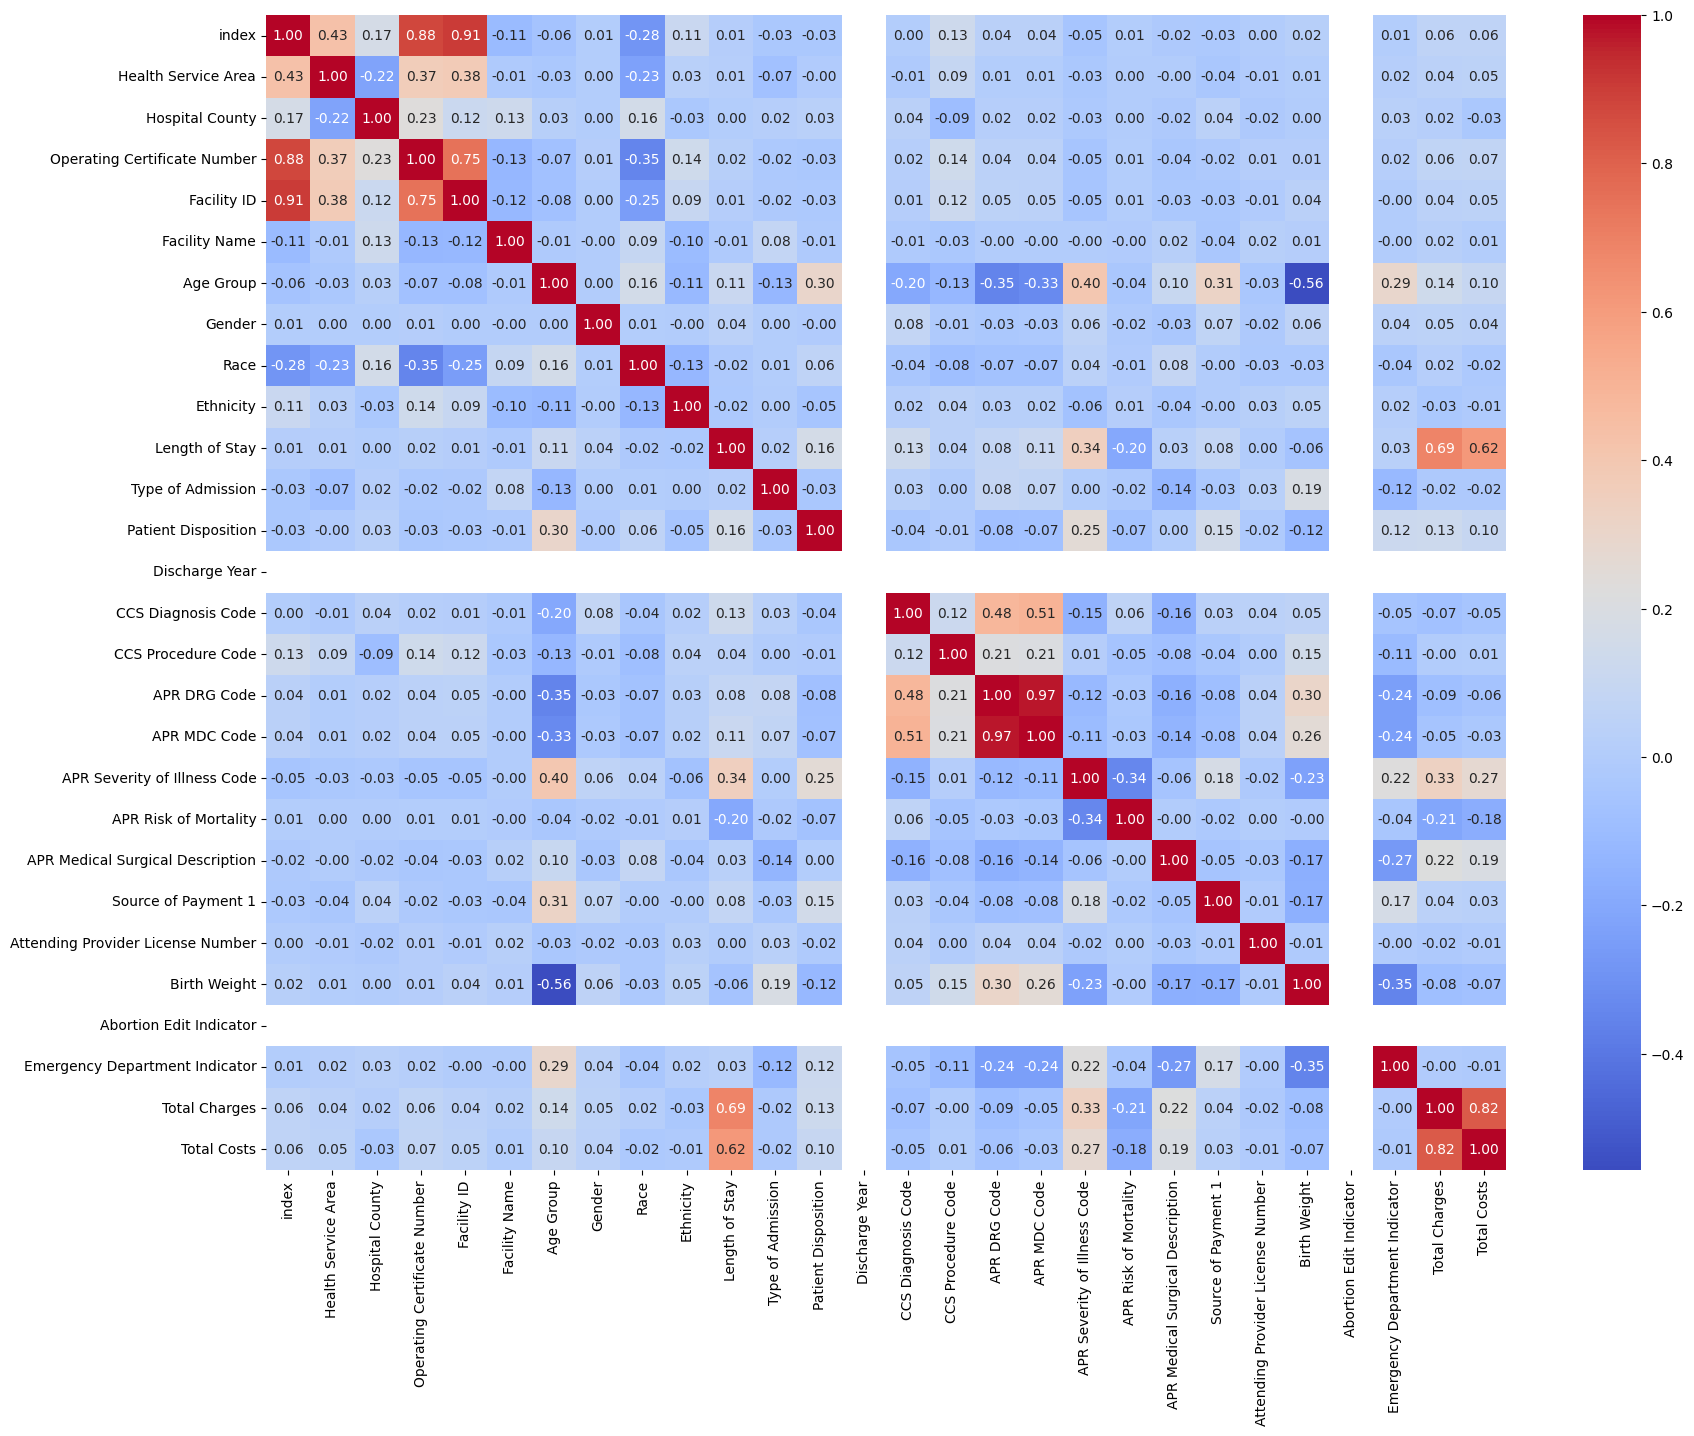

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt=".2f")

In [27]:
df.drop(['index','Discharge Year','Abortion Edit Indicator','APR DRG Code','Total Charges','Operating Certificate Number','Age Group'], axis=1, inplace=True)

<AxesSubplot:>

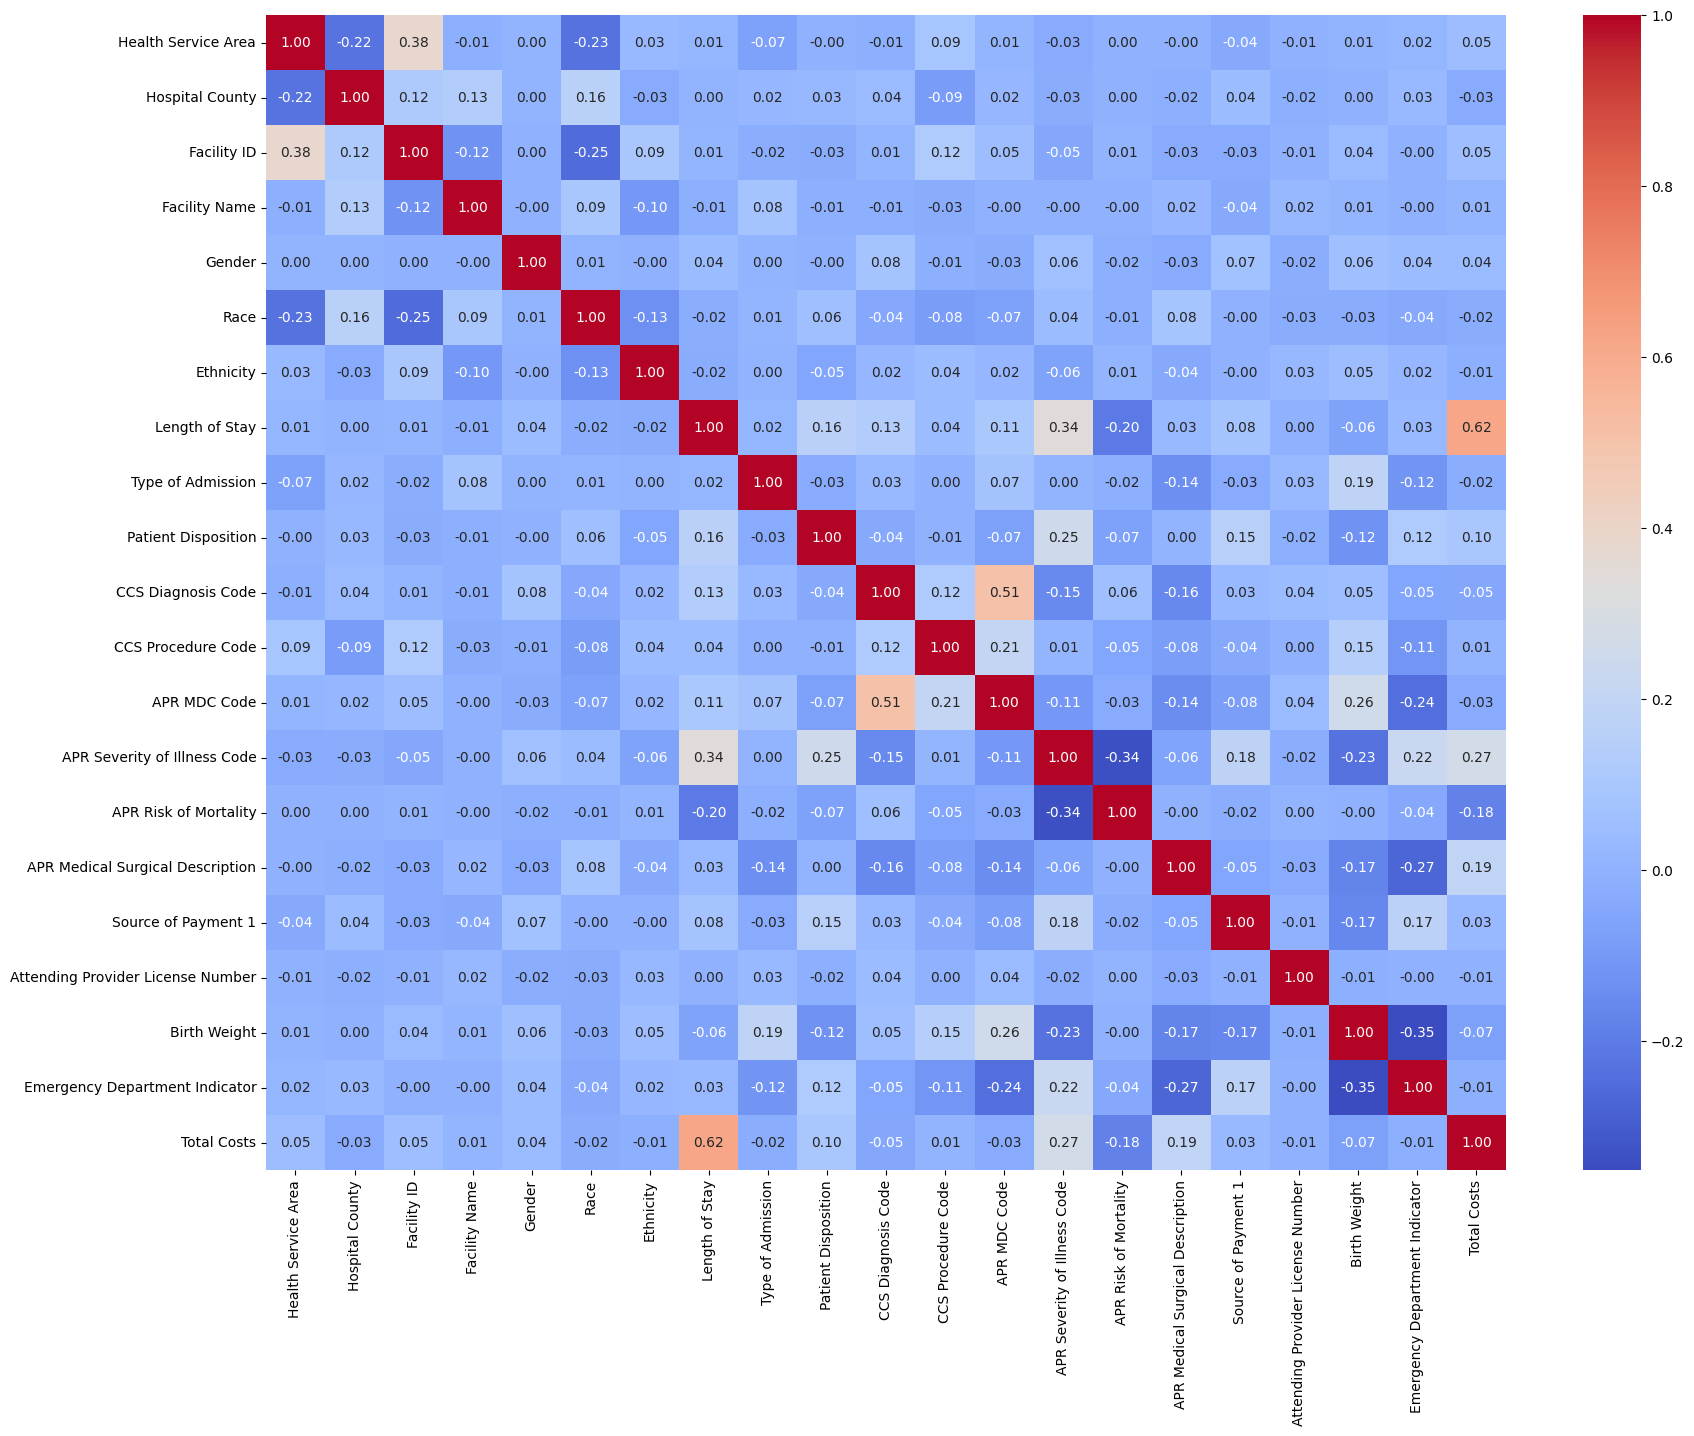

In [28]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt=".2f")

In [29]:
df

,Health Service Area,Hospital County,Facility ID,Facility Name,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Emergency Department Indicator,Total Costs
5,0,0,1.0,2,1,3,0,3,1,7,234.0,0.0,25,2,2,0,2,218155.0,0,0,3246.34
6,0,0,1.0,2,1,3,0,4,1,8,234.0,108.0,25,2,2,0,3,207219.0,0,1,6194.34
7,0,0,1.0,2,0,3,0,1,1,7,242.0,0.0,21,2,2,0,2,244921.0,0,1,1435.34
8,0,0,1.0,2,0,3,0,1,1,7,229.0,0.0,8,1,2,0,2,242288.0,0,1,2278.30
9,0,0,1.0,2,1,3,0,2,0,7,143.0,86.0,6,1,2,1,5,191936.0,0,0,7491.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,1,31,9059.0,42,0,3,0,30,0,7,661.0,218.0,20,2,2,0,3,161633.0,0,0,10878.72
2617242,1,31,9059.0,42,0,3,0,31,0,7,660.0,218.0,20,2,2,0,3,169629.0,0,0,9822.01
2617243,1,31,9059.0,42,1,3,0,36,0,7,660.0,219.0,20,2,2,0,3,169629.0,0,0,11466.50
2617244,1,31,9059.0,42,0,3,0,31,0,7,660.0,219.0,20,2,2,0,3,169629.0,0,0,9462.02


**Extracting features into X and y.**

In [30]:
X = df.drop('APR Severity of Illness Code', axis=1)
y = df['APR Severity of Illness Code']

**Splitting dataset to train and test data.**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [33]:
param_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [100, 500, 1000],
}

In [34]:
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20,30],
}

**Decision Tree Classifier**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_classifier = GridSearchCV(DecisionTreeClassifier(), param_grid=param_tree, cv=2, scoring='accuracy')

tree_classifier.fit(X_train, y_train)

y_pred_tree = tree_classifier.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Best Params : {tree_classifier.best_params_}')
print(f'Accuracy : {accuracy_tree}\n\n')

Best Params : {'criterion': 'gini', 'max_depth': 20}
Accuracy : 0.41025488840854135




c:\Users\aks50\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

**KNeighbors Classifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = GridSearchCV(KNeighborsClassifier(), param_grid=param_knn, cv=2, scoring='accuracy')

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Best Params : {knn_classifier.best_params_}')
print(f'Accuracy : {accuracy_knn}\n\n')

KeyboardInterrupt: 